In [1]:
# Importing Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
%matplotlib inline

In [32]:
df = pd.read_csv('titanic_train.csv')
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [33]:
# Dropping uncessary features
df.drop(['name','sibsp','passenger_id','parch','cabin','ticket','embarked'],axis=1,inplace=True)
df.head()

,pclass,sex,age,fare,boat,body,home.dest,survived
0,3,female,NaN,7.7333,13,NaN,NaN,1
1,3,male,38.0,8.6625,NaN,NaN,Croatia,0
2,3,female,30.0,24.1500,NaN,NaN,NaN,0
3,2,female,54.0,23.0000,4,NaN,"Cornwall / Akron, OH",1
4,2,male,40.0,13.0000,NaN,NaN,"Barre, Co Washington, VT",0


In [34]:
# Dropping uncessary features
df.drop(['boat','body','home.dest'],axis=1,inplace=True)
df.head()

,pclass,sex,age,fare,survived
0,3,female,NaN,7.7333,1
1,3,male,38.0,8.6625,0
2,3,female,30.0,24.1500,0
3,2,female,54.0,23.0000,1
4,2,male,40.0,13.0000,0


In [35]:
X = df.drop(['survived'],axis=1)
X.head()

,pclass,sex,age,fare
0,3,female,NaN,7.7333
1,3,male,38.0,8.6625
2,3,female,30.0,24.1500
3,2,female,54.0,23.0000
4,2,male,40.0,13.0000


In [36]:
y = df['survived']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: survived, dtype: int64

In [37]:
dummies = pd.get_dummies(X['sex'])
dummies.head()

,female,male
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [38]:
X = pd.concat([X,dummies],axis = 1)
X.head()

,pclass,sex,age,fare,female,male
0,3,female,NaN,7.7333,1,0
1,3,male,38.0,8.6625,0,1
2,3,female,30.0,24.1500,1,0
3,2,female,54.0,23.0000,1,0
4,2,male,40.0,13.0000,0,1


In [39]:
#Drop sex column
X.drop('sex',axis = 1, inplace=True)
X.head()

,pclass,age,fare,female,male
0,3,NaN,7.7333,1,0
1,3,38.0,8.6625,0,1
2,3,30.0,24.1500,1,0
3,2,54.0,23.0000,1,0
4,2,40.0,13.0000,0,1


In [40]:
# Check null values
X.isnull().sum()

pclass      0
age       174
fare        1
female      0
male        0
dtype: int64

In [41]:
age_mean = round(np.mean(X['age']))
X['age'] = X['age'].fillna(age_mean)
X.head()

,pclass,age,fare,female,male
0,3,30.0,7.7333,1,0
1,3,38.0,8.6625,0,1
2,3,30.0,24.1500,1,0
3,2,54.0,23.0000,1,0
4,2,40.0,13.0000,0,1


In [42]:
fare_mean = round(np.mean(X['fare']))
X['fare'] = X['fare'].fillna(fare_mean)
X.head()

,pclass,age,fare,female,male
0,3,30.0,7.7333,1,0
1,3,38.0,8.6625,0,1
2,3,30.0,24.1500,1,0
3,2,54.0,23.0000,1,0
4,2,40.0,13.0000,0,1


In [43]:
X.isnull().sum()

pclass    0
age       0
fare      0
female    0
male      0
dtype: int64

In [44]:
X.shape

(850, 5)

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
len(X_train)

680

In [93]:
len(X_test)

170

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
model = GaussianNB()

In [96]:
model.fit(X_train,y_train)

GaussianNB()

In [97]:
y_pred = model.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(y_test,y_pred)

0.7764705882352941

In [100]:
model.score(X_test,y_test)

0.7764705882352941

In [101]:
model.score(X_train,y_train)

0.7617647058823529

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[92, 27],
       [11, 40]], dtype=int64)

<AxesSubplot:>

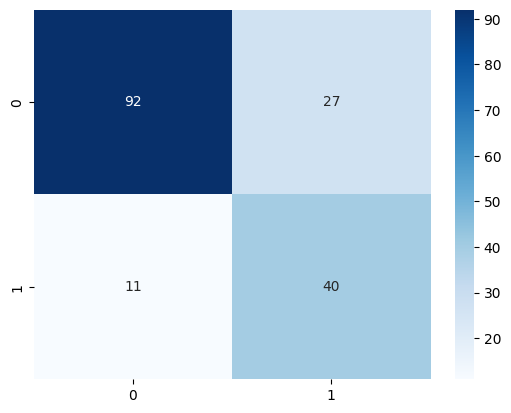

In [104]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')